In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import warnings; warnings.simplefilter('ignore')
%env JOBLIB_TEMP_FOLDER=/tmp

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

env: JOBLIB_TEMP_FOLDER=/tmp


# Functions

In [3]:
def comparing_with_sota_NS(models_list, names_list, x_train, y_train, x_test, y_test):
    """This function is used to get results according to those that are used by authors in the original Nonspeech7k article

    Args:
        models_list (list): all the models that are needed
        names_list (_type_): names of the models that will be printed later
        x_train (_type_): dataset that is used for training a model
        y_train (_type_): target values for train dataset (x_train)
        x_test (_type_): dataset that is used for testing a model
        y_test (_type_): target values for test dataset (x_test)
    """
    for model, name in zip(models_list, names_list):
   
        clf = model
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        # counting F1 metrics for each class
        class0_f1 = f1_score(y_test, y_pred, average = None, labels = [0]).tolist()
        class1_f1 = f1_score(y_test, y_pred, average = None, labels = [1]).tolist()
        class2_f1 = f1_score(y_test, y_pred, average = None, labels = [2]).tolist()
        class3_f1 = f1_score(y_test, y_pred, average = None, labels = [3]).tolist()
        class4_f1 = f1_score(y_test, y_pred, average = None, labels = [4]).tolist()
        class5_f1 = f1_score(y_test, y_pred, average = None, labels = [5]).tolist()
        class6_f1 = f1_score(y_test, y_pred, average = None, labels = [6]).tolist()
        
        # counting Precision metrics for each class
        class0_pr = precision_score(y_test, y_pred, average = None, labels = [0]).tolist()
        class1_pr = precision_score(y_test, y_pred, average = None, labels = [1]).tolist()
        class2_pr = precision_score(y_test, y_pred, average = None, labels = [2]).tolist()
        class3_pr = precision_score(y_test, y_pred, average = None, labels = [3]).tolist()
        class4_pr = precision_score(y_test, y_pred, average = None, labels = [4]).tolist()
        class5_pr = precision_score(y_test, y_pred, average = None, labels = [5]).tolist()
        class6_pr = precision_score(y_test, y_pred, average = None, labels = [6]).tolist()
        
        # counting Recall metrics for each class
        class0_rec = recall_score(y_test, y_pred, average = None, labels = [0]).tolist()
        class1_rec = recall_score(y_test, y_pred, average = None, labels = [1]).tolist()
        class2_rec = recall_score(y_test, y_pred, average = None, labels = [2]).tolist()
        class3_rec = recall_score(y_test, y_pred, average = None, labels = [3]).tolist()
        class4_rec = recall_score(y_test, y_pred, average = None, labels = [4]).tolist()
        class5_rec = recall_score(y_test, y_pred, average = None, labels = [5]).tolist()
        class6_rec = recall_score(y_test, y_pred, average = None, labels = [6]).tolist()
        
        # counting weighted Presicion, Recall and F1 metrics for each class
        recall_weighted = recall_score(y_test, y_pred, average = 'weighted')
        precision_weighted = precision_score(y_test, y_pred, average = 'weighted')
        f1_weighted = f1_score(y_test, y_pred, average = 'weighted')
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f'{name}:')
        print('------------------------------------------------')
        print('|  Class       |F1-score |Recall    |Precision |')
        print('------------------------------------------------') 
        print(f'|breath/дыхание|{"{:.2f}".format(class0_f1[0])}     |{"{:.2f}".format(class0_rec[0])}      |{"{:.2f}".format(class0_pr[0])}      |')
        print(f'|cough/кашель  |{"{:.2f}".format(class1_f1[0])}     |{"{:.2f}".format(class1_rec[0])}      |{"{:.2f}".format(class1_pr[0])}      |')
        print(f'|crying/плач   |{"{:.2f}".format(class2_f1[0])}     |{"{:.2f}".format(class2_rec[0])}      |{"{:.2f}".format(class2_pr[0])}      |')
        print(f'|laugh/смех    |{"{:.2f}".format(class3_f1[0])}     |{"{:.2f}".format(class3_rec[0])}      |{"{:.2f}".format(class3_pr[0])}      |')
        print(f'|screaming/крик|{"{:.2f}".format(class4_f1[0])}     |{"{:.2f}".format(class4_rec[0])}      |{"{:.2f}".format(class4_pr[0])}      |')
        print(f'|sneeze/чихание|{"{:.2f}".format(class5_f1[0])}     |{"{:.2f}".format(class5_rec[0])}      |{"{:.2f}".format(class5_pr[0])}      |')
        print(f'|yawn/зевание  |{"{:.2f}".format(class6_f1[0])}     |{"{:.2f}".format(class6_rec[0])}      |{"{:.2f}".format(class6_pr[0])}      |')
        print('------------------------------------------------')
        print(f'Weighted average Precision : {"{:.2f}".format(precision_weighted)}              |')
        print('------------------------------------------------')
        print(f'Weighted average Recall : {"{:.2f}".format(recall_weighted)}                 |')
        print('------------------------------------------------')
        print(f'Weighted average F1 : {"{:.2f}".format(f1_weighted)}                     |')
        print('------------------------------------------------')
        print(f'Accuracy : {"{:.2f}".format(accuracy)}                                |')
        print('------------------------------------------------')
        print()
        titles_options = [('Confusion matrix:')]
        target_names=[f"breath/дыхание", f"cough/кашель", f"cry/плач", f"laugh/смех", f"scream/крик", f"sneeze/чихание", f"yawn/зевание"]

        conf = confusion_matrix(y_test, y_pred)
        for title in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(model,x_test,y_test,display_labels=target_names,cmap=plt.cm.Blues, colorbar=False, normalize=None, xticks_rotation='vertical')
            disp.ax_.set_title(title)
            print(title)
            print(disp.confusion_matrix)

        plt.show()
        

In [4]:
def plot_relation_between_VAR_and_DIM(x_train_scaler):
    """
    Function to use PCA (dimensionality reduction) and plot the relation between the Variance and the Dimensions
    : param x_train_scaler - dataset that is used for training
    """
    pca = PCA()
    pca.fit(x_train_scaler)
    cumsum = np.cumsum(pca.explained_variance_ratio_)*100
    d = [n for n in range(len(cumsum))]
    plt.figure(figsize=(5, 5))
    plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
    plt.title('Cumulative Explained Variance as a Function of the Number of Components')
    plt.ylabel('Cumulative Explained variance')
    plt.xlabel('Principal components')
    plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
    plt.legend(loc='best')

# Models that are used in the experiment

In [23]:
models = [SVC(kernel='poly'), 
          SVC(kernel='rbf'), 
          SVC(kernel='sigmoid'), 
          LDA(), 
          KNeighborsClassifier(n_neighbors=7), 
          LogisticRegression(), 
          DecisionTreeClassifier(),
          MLPClassifier(hidden_layer_sizes=(256, 256, 256), validation_fraction=0.5, verbose=False, random_state=1)]

names = ['SVM_Poly', 'SVM_RBF', 'SVM_Sigmoid', 'LDA', 'KNN', 'Logistic Regression', 'Decision Tree', 'Neural Network']

# Nonspeech7k datasets

## GEMAPS FEATURES

In [19]:
# Data with GEMAPS features:
nonspeech_gemaps_train = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/gemaps/Nonspeech_gemaps_train.csv")
nonspeech_gemaps_test = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/gemaps/Nonspeech_gemaps_test.csv")
nonspeech_gemaps_dataset_train = nonspeech_gemaps_train.to_numpy()
nonspeech_gemaps_dataset_test = nonspeech_gemaps_test.to_numpy()

nonspeech_targets_train_gemaps = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/gemaps/Nonspeech_target_values_gemaps_train.csv")
nonspeech_targets_test_gemaps = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/gemaps/Nonspeech_target_values_gemaps_test.csv")

## eGEMAPS FEATURES

In [7]:
# Data with eGEMAPS features:
nonspeech_egemaps_train = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/egemaps/Nonspeech_egemaps_train.csv")
nonspeech_egemaps_test = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/egemaps/Nonspeech_egemaps_test.csv")
nonspeech_egemaps_dataset_train = nonspeech_egemaps_train.to_numpy()
nonspeech_egemaps_dataset_test = nonspeech_egemaps_test.to_numpy()

nonspeech_targets_train_egemaps = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/egemaps/Nonspeech_target_values_egemaps_train.csv")
nonspeech_targets_test_egemaps = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/egemaps/Nonspeech_target_values_egemaps_test.csv")

## INTERSPEECH 2009 FEATURES

In [8]:
# Data with Interspeech 2009 features:
nonspeech_is09_train = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/IS09/Nonspeech_IS09_train.csv")
nonspeech_is09_test = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/IS09/Nonspeech_IS09_test.csv")
nonspeech_is09_train = nonspeech_is09_train.to_numpy()
nonspeech_is09_test = nonspeech_is09_test.to_numpy()

nonspeech_targets_train_is09 = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/IS09/Nonspeech_target_values_IS09_train.csv")
nonspeech_targets_test_is09 = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/IS09/Nonspeech_target_values_IS09_test.csv")

## INTERSPEECH 2010 FEATURES

In [9]:
# Data with Interspeech 2010 features:
nonspeech_is10_train = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/IS10/Nonspeech_IS10_train.csv")
nonspeech_is10_test = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/IS10/Nonspeech_IS10_test.csv")
nonspeech_is10_train = nonspeech_is10_train.to_numpy()
nonspeech_is10_test = nonspeech_is10_test.to_numpy()

nonspeech_targets_train_is10 = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/IS10/Nonspeech_target_values_IS10_train.csv")
nonspeech_targets_test_is10 = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/IS10/Nonspeech_target_values_IS10_test.csv")

## INTERSPEECH 2013 FEATURES

In [10]:
# Data with Interspeech 2013 features:
nonspeech_is13_train = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/IS13/Nonspeech_IS13_train.csv")
nonspeech_is13_test = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/IS13/Nonspeech_IS13_test.csv")
nonspeech_is13_train = nonspeech_is13_train.to_numpy()
nonspeech_is13_test = nonspeech_is13_test.to_numpy()

nonspeech_targets_train_is13 = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/IS13/Nonspeech_target_values_IS13_train.csv")
nonspeech_targets_test_is13 = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/research_on_features/признаки_Nonspeech7k/SOTA/IS13/Nonspeech_target_values_IS13_test.csv")

## GEMAPS FEATURES TEST 

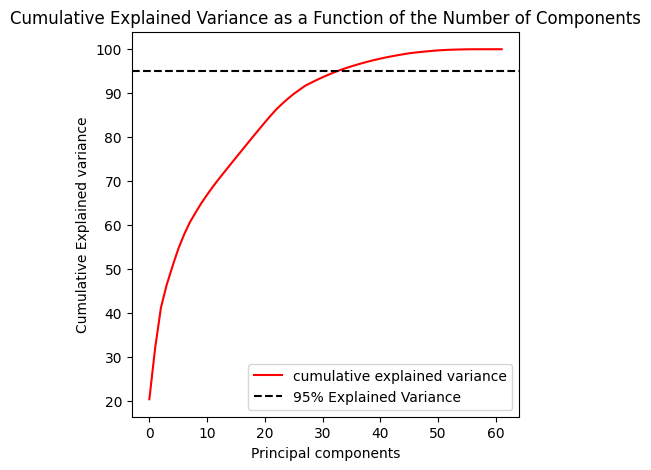

In [20]:
scaler.fit(nonspeech_gemaps_dataset_train)
nonspeech_gemaps_train_scaler = scaler.transform(nonspeech_gemaps_dataset_train)
nonspeech_gemaps_test_scaler = scaler.transform(nonspeech_gemaps_dataset_test)

plot_relation_between_VAR_and_DIM(nonspeech_gemaps_train_scaler)

In [21]:
pca = PCA(.95) 
pca.fit(nonspeech_gemaps_train_scaler)

nonspeech_gemaps_train_pca = pca.transform(nonspeech_gemaps_train_scaler)
nonspeech_gemaps_test_pca = pca.transform(nonspeech_gemaps_test_scaler)

SVM_Poly:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.84     |0.78      |0.91      |
|cough/кашель  |0.36     |0.29      |0.48      |
|crying/плач   |0.61     |0.71      |0.54      |
|laugh/смех    |0.69     |0.81      |0.60      |
|screaming/крик|0.84     |0.76      |0.95      |
|sneeze/чихание|0.22     |0.17      |0.33      |
|yawn/зевание  |0.37     |0.24      |0.80      |
------------------------------------------------
Weighted average Precision : 0.67              |
------------------------------------------------
Weighted average Recall : 0.65                 |
------------------------------------------------
Weighted average F1 : 0.64                     |
------------------------------------------------
Accuracy : 0.65                                |
------------------------------------------------

Confusion matrix:
[[124   5  26   2   0   1   2]
 [  2  20

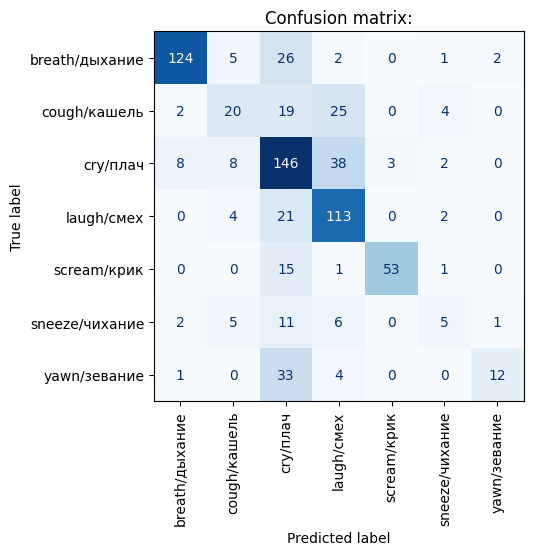

SVM_RBF:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.84     |0.83      |0.85      |
|cough/кашель  |0.54     |0.60      |0.49      |
|crying/плач   |0.71     |0.68      |0.74      |
|laugh/смех    |0.80     |0.84      |0.77      |
|screaming/крик|0.83     |0.86      |0.80      |
|sneeze/чихание|0.47     |0.43      |0.52      |
|yawn/зевание  |0.65     |0.60      |0.71      |
------------------------------------------------
Weighted average Precision : 0.74              |
------------------------------------------------
Weighted average Recall : 0.74                 |
------------------------------------------------
Weighted average F1 : 0.74                     |
------------------------------------------------
Accuracy : 0.74                                |
------------------------------------------------

Confusion matrix:
[[133   5   7   2   2   1  10]
 [  3  42 

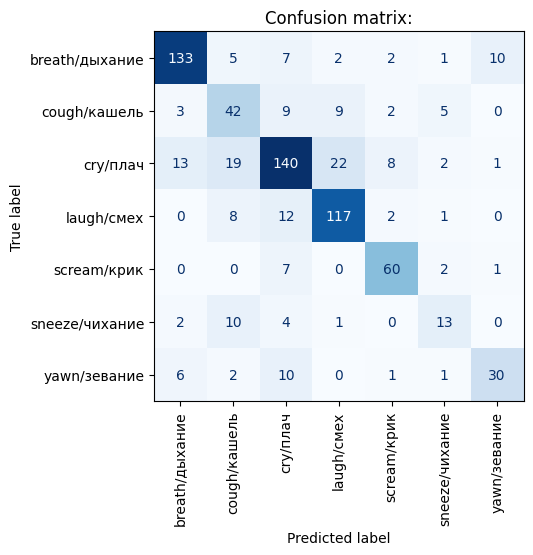

SVM_Sigmoid:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.88     |0.91      |0.86      |
|cough/кашель  |0.32     |0.43      |0.25      |
|crying/плач   |0.58     |0.51      |0.67      |
|laugh/смех    |0.55     |0.54      |0.55      |
|screaming/крик|0.26     |0.30      |0.23      |
|sneeze/чихание|0.16     |0.13      |0.19      |
|yawn/зевание  |0.25     |0.20      |0.34      |
------------------------------------------------
Weighted average Precision : 0.56              |
------------------------------------------------
Weighted average Recall : 0.54                 |
------------------------------------------------
Weighted average F1 : 0.54                     |
------------------------------------------------
Accuracy : 0.54                                |
------------------------------------------------

Confusion matrix:
[[145   7   1   1   4   2   0]
 [  4 

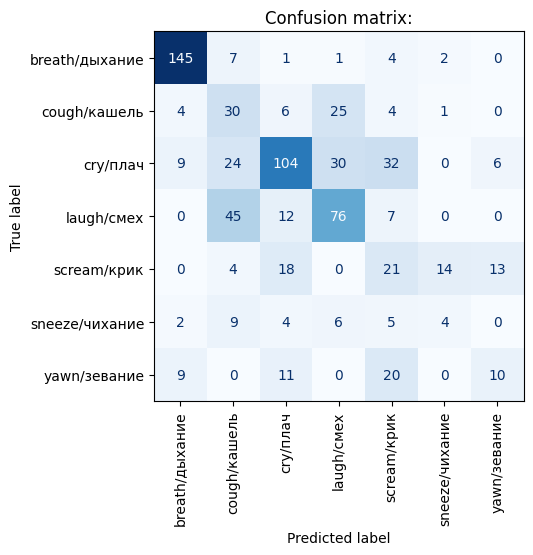

LDA:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.78     |0.72      |0.86      |
|cough/кашель  |0.39     |0.39      |0.40      |
|crying/плач   |0.65     |0.63      |0.66      |
|laugh/смех    |0.77     |0.84      |0.71      |
|screaming/крик|0.74     |0.77      |0.71      |
|sneeze/чихание|0.39     |0.37      |0.42      |
|yawn/зевание  |0.60     |0.64      |0.56      |
------------------------------------------------
Weighted average Precision : 0.68              |
------------------------------------------------
Weighted average Recall : 0.67                 |
------------------------------------------------
Weighted average F1 : 0.67                     |
------------------------------------------------
Accuracy : 0.67                                |
------------------------------------------------

Confusion matrix:
[[115   8  15   0   9   5   8]
 [  2  27  12 

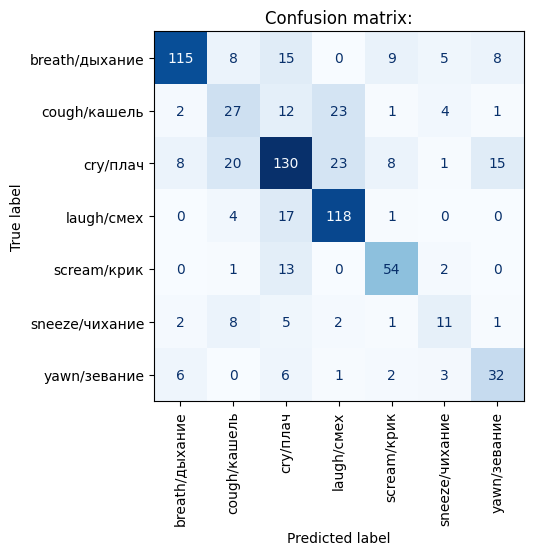

KNN:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.85     |0.86      |0.84      |
|cough/кашель  |0.35     |0.41      |0.31      |
|crying/плач   |0.64     |0.60      |0.68      |
|laugh/смех    |0.67     |0.78      |0.59      |
|screaming/крик|0.75     |0.76      |0.75      |
|sneeze/чихание|0.26     |0.17      |0.62      |
|yawn/зевание  |0.54     |0.38      |0.90      |
------------------------------------------------
Weighted average Precision : 0.68              |
------------------------------------------------
Weighted average Recall : 0.66                 |
------------------------------------------------
Weighted average F1 : 0.65                     |
------------------------------------------------
Accuracy : 0.66                                |
------------------------------------------------

Confusion matrix:
[[137   6   6   6   3   0   2]
 [  7  29  10 

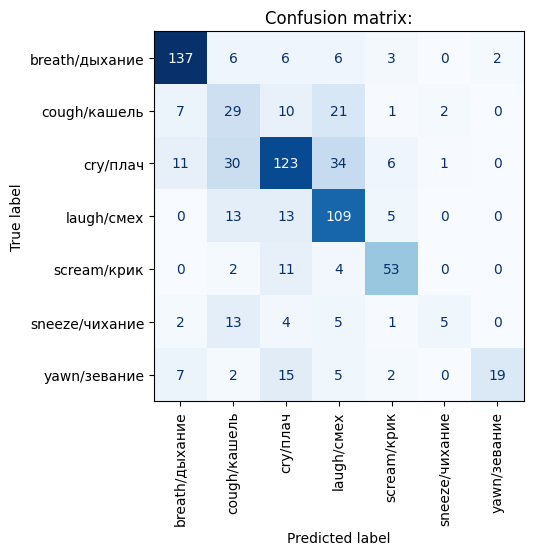

Logistic Regression:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.82     |0.78      |0.87      |
|cough/кашель  |0.46     |0.49      |0.43      |
|crying/плач   |0.65     |0.63      |0.67      |
|laugh/смех    |0.76     |0.83      |0.71      |
|screaming/крик|0.73     |0.77      |0.69      |
|sneeze/чихание|0.42     |0.40      |0.44      |
|yawn/зевание  |0.59     |0.54      |0.66      |
------------------------------------------------
Weighted average Precision : 0.69              |
------------------------------------------------
Weighted average Recall : 0.69                 |
------------------------------------------------
Weighted average F1 : 0.69                     |
------------------------------------------------
Accuracy : 0.69                                |
------------------------------------------------

Confusion matrix:
[[125  12   8   0   6   2   7

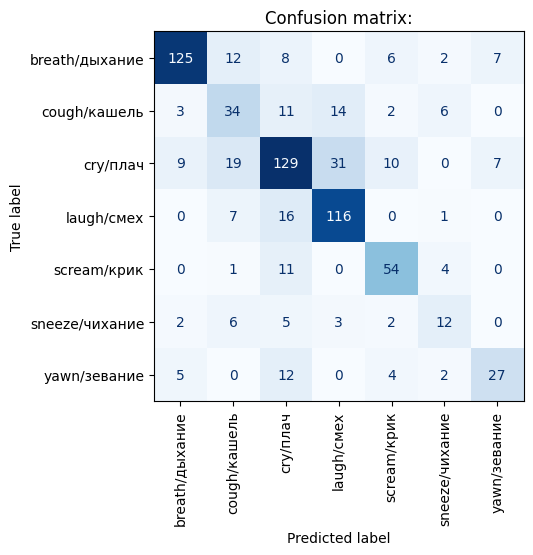

Decision Tree:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.75     |0.66      |0.86      |
|cough/кашель  |0.44     |0.56      |0.36      |
|crying/плач   |0.57     |0.53      |0.61      |
|laugh/смех    |0.49     |0.53      |0.46      |
|screaming/крик|0.50     |0.50      |0.50      |
|sneeze/чихание|0.13     |0.13      |0.12      |
|yawn/зевание  |0.48     |0.48      |0.47      |
------------------------------------------------
Weighted average Precision : 0.57              |
------------------------------------------------
Weighted average Recall : 0.54                 |
------------------------------------------------
Weighted average F1 : 0.55                     |
------------------------------------------------
Accuracy : 0.54                                |
------------------------------------------------

Confusion matrix:
[[106   8  10  16   8   3   9]
 [  

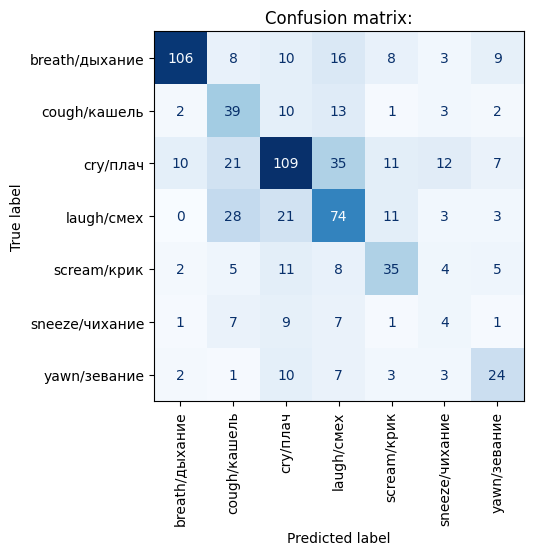

Neural Network:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.80     |0.71      |0.90      |
|cough/кашель  |0.50     |0.57      |0.44      |
|crying/плач   |0.64     |0.55      |0.76      |
|laugh/смех    |0.72     |0.80      |0.65      |
|screaming/крик|0.78     |0.87      |0.70      |
|sneeze/чихание|0.47     |0.60      |0.39      |
|yawn/зевание  |0.66     |0.70      |0.62      |
------------------------------------------------
Weighted average Precision : 0.71              |
------------------------------------------------
Weighted average Recall : 0.68                 |
------------------------------------------------
Weighted average F1 : 0.68                     |
------------------------------------------------
Accuracy : 0.68                                |
------------------------------------------------

Confusion matrix:
[[114  11   5   7   3   4  16]
 [ 

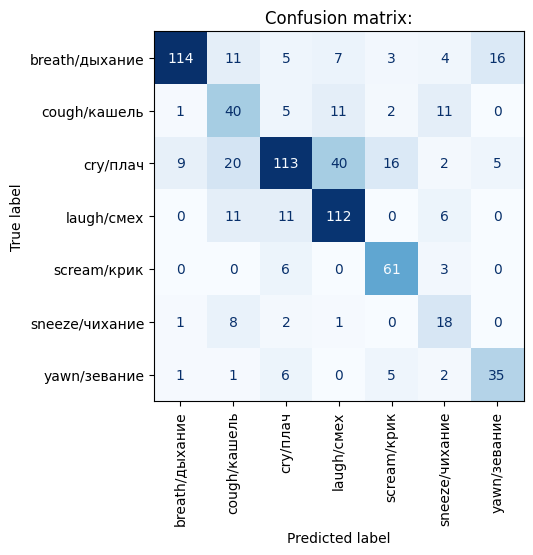

In [24]:
comparing_with_sota_NS(models, names, nonspeech_gemaps_train_pca, nonspeech_targets_train_gemaps, nonspeech_gemaps_test_pca, nonspeech_targets_test_gemaps)

## eGEMAPS FEATURES TEST

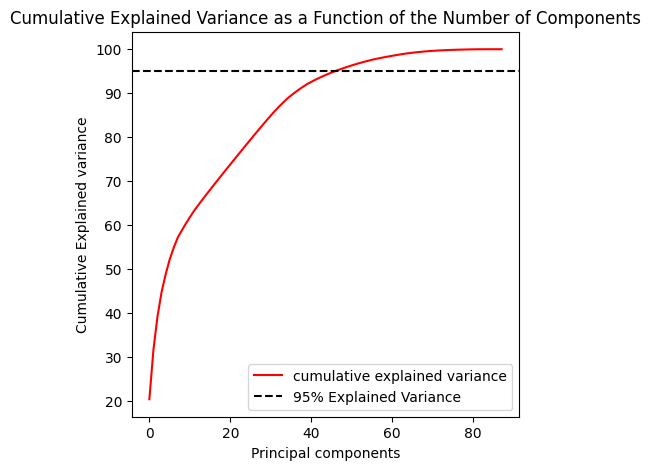

In [25]:
scaler.fit(nonspeech_egemaps_dataset_train)
nonspeech_egemaps_train_scaler = scaler.transform(nonspeech_egemaps_dataset_train)
nonspeech_egemaps_test_scaler = scaler.transform(nonspeech_egemaps_dataset_test)

plot_relation_between_VAR_and_DIM(nonspeech_egemaps_train_scaler)

In [26]:
pca = PCA(.95) 
pca.fit(nonspeech_egemaps_train_scaler)

nonspeech_egemaps_train_pca = pca.transform(nonspeech_egemaps_train_scaler)
nonspeech_egemaps_test_pca = pca.transform(nonspeech_egemaps_test_scaler)

SVM_Poly:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.81     |0.73      |0.91      |
|cough/кашель  |0.36     |0.27      |0.51      |
|crying/плач   |0.63     |0.70      |0.57      |
|laugh/смех    |0.68     |0.87      |0.56      |
|screaming/крик|0.80     |0.70      |0.94      |
|sneeze/чихание|0.30     |0.27      |0.35      |
|yawn/зевание  |0.32     |0.20      |0.77      |
------------------------------------------------
Weighted average Precision : 0.68              |
------------------------------------------------
Weighted average Recall : 0.65                 |
------------------------------------------------
Weighted average F1 : 0.63                     |
------------------------------------------------
Accuracy : 0.65                                |
------------------------------------------------

Confusion matrix:
[[117   4  32   5   0   1   1]
 [  2  19

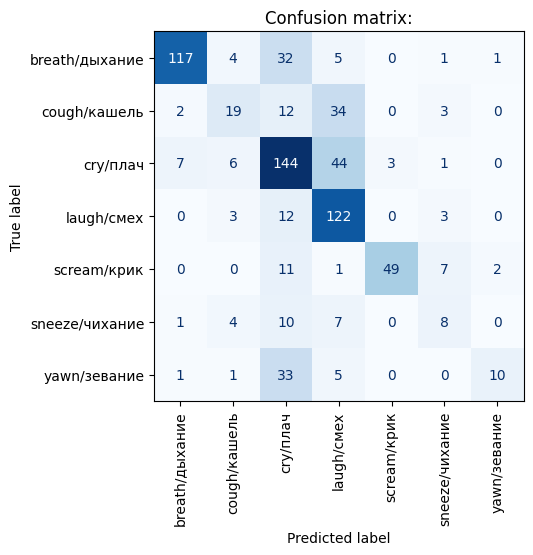

SVM_RBF:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.86     |0.84      |0.88      |
|cough/кашель  |0.57     |0.64      |0.51      |
|crying/плач   |0.71     |0.68      |0.74      |
|laugh/смех    |0.77     |0.79      |0.74      |
|screaming/крик|0.83     |0.86      |0.80      |
|sneeze/чихание|0.50     |0.47      |0.54      |
|yawn/зевание  |0.69     |0.66      |0.72      |
------------------------------------------------
Weighted average Precision : 0.74              |
------------------------------------------------
Weighted average Recall : 0.74                 |
------------------------------------------------
Weighted average F1 : 0.74                     |
------------------------------------------------
Accuracy : 0.74                                |
------------------------------------------------

Confusion matrix:
[[134   6   7   2   1   1   9]
 [  2  45 

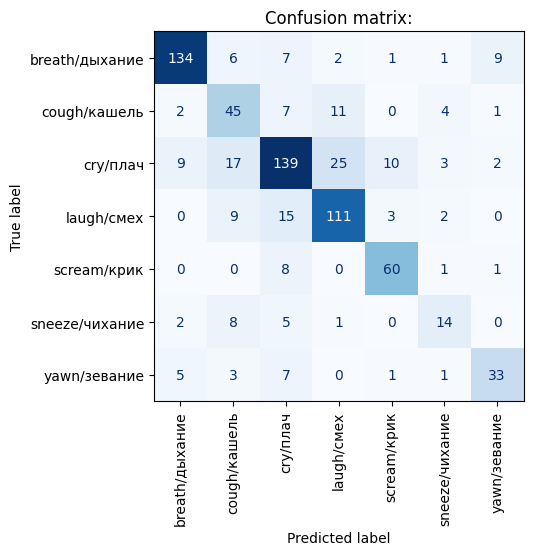

SVM_Sigmoid:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.87     |0.88      |0.86      |
|cough/кашель  |0.30     |0.44      |0.22      |
|crying/плач   |0.62     |0.56      |0.70      |
|laugh/смех    |0.58     |0.52      |0.65      |
|screaming/крик|0.30     |0.36      |0.26      |
|sneeze/чихание|0.21     |0.17      |0.28      |
|yawn/зевание  |0.41     |0.32      |0.55      |
------------------------------------------------
Weighted average Precision : 0.61              |
------------------------------------------------
Weighted average Recall : 0.56                 |
------------------------------------------------
Weighted average F1 : 0.57                     |
------------------------------------------------
Accuracy : 0.56                                |
------------------------------------------------

Confusion matrix:
[[141   7   4   1   4   3   0]
 [  3 

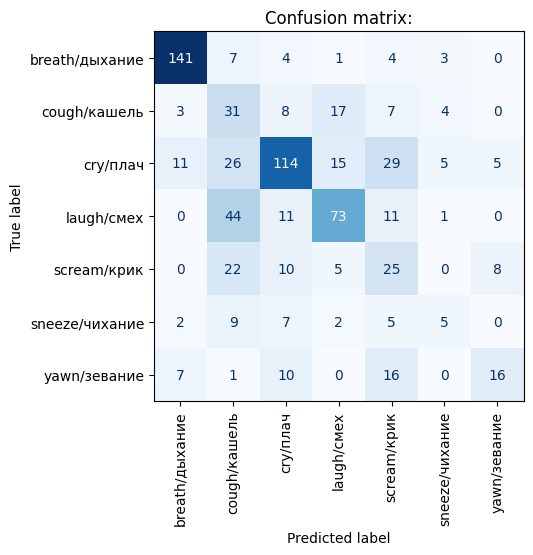

LDA:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.82     |0.76      |0.89      |
|cough/кашель  |0.32     |0.34      |0.30      |
|crying/плач   |0.65     |0.60      |0.72      |
|laugh/смех    |0.76     |0.81      |0.72      |
|screaming/крик|0.73     |0.79      |0.68      |
|sneeze/чихание|0.37     |0.47      |0.31      |
|yawn/зевание  |0.64     |0.66      |0.62      |
------------------------------------------------
Weighted average Precision : 0.69              |
------------------------------------------------
Weighted average Recall : 0.67                 |
------------------------------------------------
Weighted average F1 : 0.67                     |
------------------------------------------------
Accuracy : 0.67                                |
------------------------------------------------

Confusion matrix:
[[122  12   7   0   7   6   6]
 [  1  24  10 

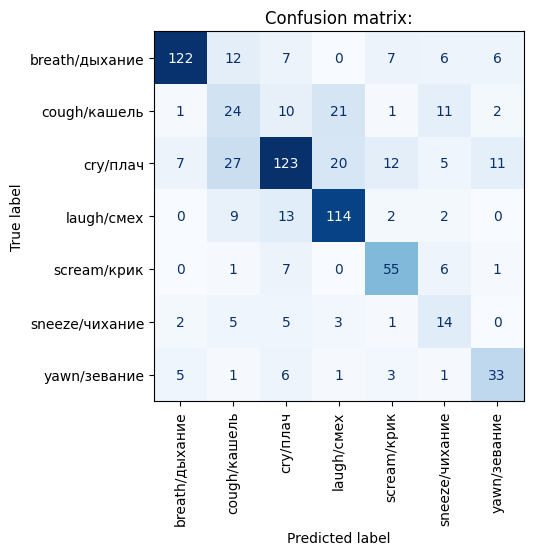

KNN:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.85     |0.84      |0.86      |
|cough/кашель  |0.37     |0.40      |0.35      |
|crying/плач   |0.60     |0.57      |0.64      |
|laugh/смех    |0.59     |0.71      |0.51      |
|screaming/крик|0.79     |0.81      |0.76      |
|sneeze/чихание|0.15     |0.10      |0.27      |
|yawn/зевание  |0.52     |0.38      |0.83      |
------------------------------------------------
Weighted average Precision : 0.64              |
------------------------------------------------
Weighted average Recall : 0.63                 |
------------------------------------------------
Weighted average F1 : 0.63                     |
------------------------------------------------
Accuracy : 0.63                                |
------------------------------------------------

Confusion matrix:
[[135   5   4  10   1   1   4]
 [  1  28   7 

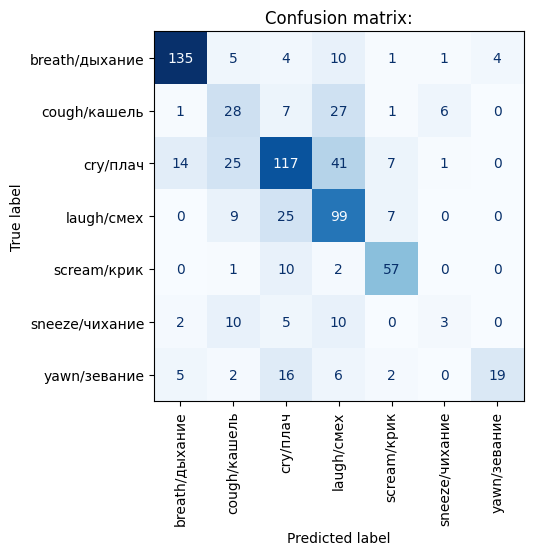

Logistic Regression:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.79     |0.71      |0.88      |
|cough/кашель  |0.48     |0.54      |0.43      |
|crying/плач   |0.65     |0.64      |0.66      |
|laugh/смех    |0.77     |0.84      |0.72      |
|screaming/крик|0.75     |0.77      |0.73      |
|sneeze/чихание|0.28     |0.27      |0.30      |
|yawn/зевание  |0.69     |0.66      |0.73      |
------------------------------------------------
Weighted average Precision : 0.70              |
------------------------------------------------
Weighted average Recall : 0.68                 |
------------------------------------------------
Weighted average F1 : 0.69                     |
------------------------------------------------
Accuracy : 0.68                                |
------------------------------------------------

Confusion matrix:
[[114  18  16   0   4   3   5

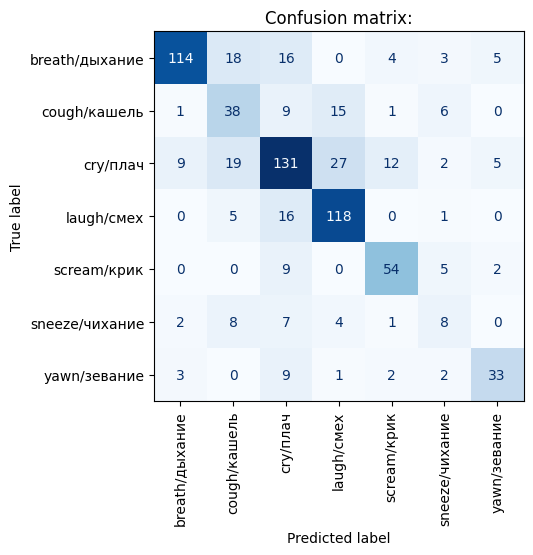

Decision Tree:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.71     |0.62      |0.83      |
|cough/кашель  |0.37     |0.44      |0.32      |
|crying/плач   |0.54     |0.50      |0.60      |
|laugh/смех    |0.50     |0.54      |0.46      |
|screaming/крик|0.53     |0.56      |0.51      |
|sneeze/чихание|0.17     |0.20      |0.14      |
|yawn/зевание  |0.33     |0.34      |0.31      |
------------------------------------------------
Weighted average Precision : 0.55              |
------------------------------------------------
Weighted average Recall : 0.51                 |
------------------------------------------------
Weighted average F1 : 0.52                     |
------------------------------------------------
Accuracy : 0.51                                |
------------------------------------------------

Confusion matrix:
[[ 99  13  13   9   4   7  15]
 [  

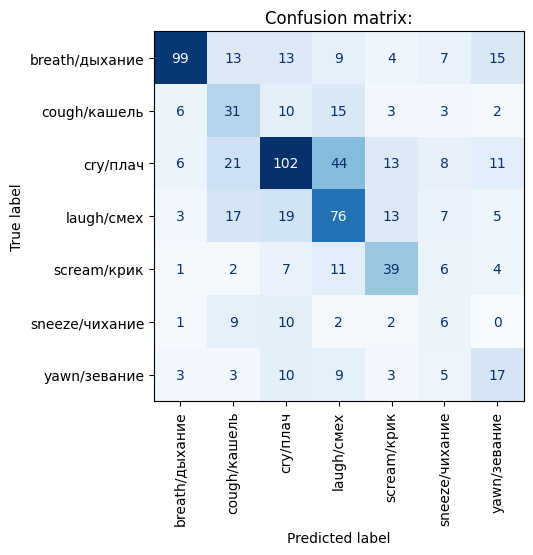

Neural Network:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.79     |0.71      |0.88      |
|cough/кашель  |0.54     |0.63      |0.47      |
|crying/плач   |0.64     |0.55      |0.77      |
|laugh/смех    |0.73     |0.77      |0.69      |
|screaming/крик|0.76     |0.84      |0.69      |
|sneeze/чихание|0.40     |0.47      |0.35      |
|yawn/зевание  |0.64     |0.78      |0.54      |
------------------------------------------------
Weighted average Precision : 0.71              |
------------------------------------------------
Weighted average Recall : 0.68                 |
------------------------------------------------
Weighted average F1 : 0.68                     |
------------------------------------------------
Accuracy : 0.68                                |
------------------------------------------------

Confusion matrix:
[[114  12   8   2   1   3  20]
 [ 

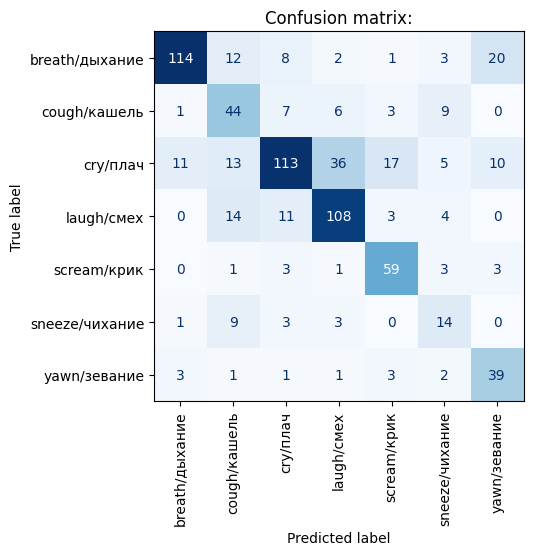

In [27]:
comparing_with_sota_NS(models, names, nonspeech_egemaps_train_pca, nonspeech_targets_train_egemaps, nonspeech_egemaps_test_pca, nonspeech_targets_test_egemaps)

## INTERSPEECH2009 FEATURES TEST

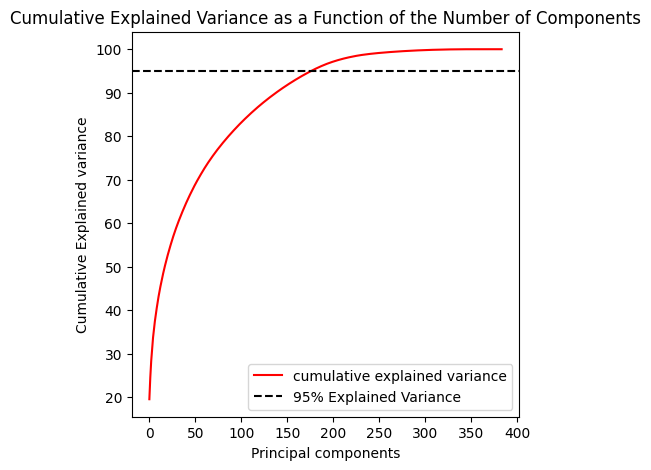

In [28]:
scaler.fit(nonspeech_is09_train)
nonspeech_IS09_train_scaler = scaler.transform(nonspeech_is09_train)
nonspeech_IS09_test_scaler = scaler.transform(nonspeech_is09_test)

plot_relation_between_VAR_and_DIM(nonspeech_IS09_train_scaler)

In [29]:
pca = PCA(.95) 
pca.fit(nonspeech_IS09_train_scaler)

nonspeech_IS09_train_pca = pca.transform(nonspeech_IS09_train_scaler)
nonspeech_IS09_test_pca = pca.transform(nonspeech_IS09_test_scaler)

SVM_Poly:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.83     |0.79      |0.88      |
|cough/кашель  |0.58     |0.51      |0.65      |
|crying/плач   |0.75     |0.75      |0.75      |
|laugh/смех    |0.68     |0.86      |0.56      |
|screaming/крик|0.74     |0.67      |0.82      |
|sneeze/чихание|0.50     |0.47      |0.54      |
|yawn/зевание  |0.59     |0.44      |0.92      |
------------------------------------------------
Weighted average Precision : 0.74              |
------------------------------------------------
Weighted average Recall : 0.72                 |
------------------------------------------------
Weighted average F1 : 0.72                     |
------------------------------------------------
Accuracy : 0.72                                |
------------------------------------------------

Confusion matrix:
[[127   2  15  11   4   0   1]
 [  0  36

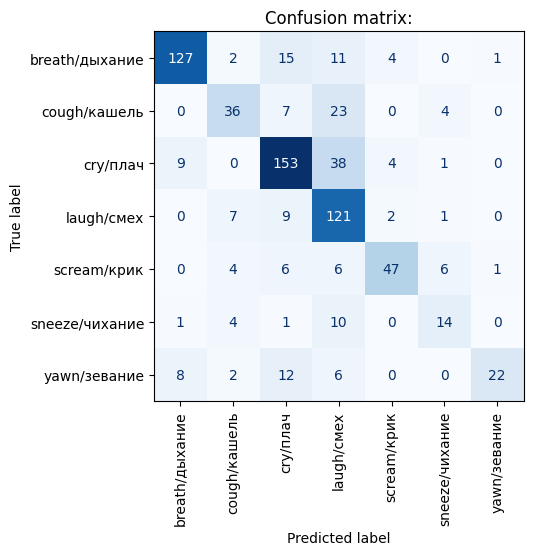

SVM_RBF:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.87     |0.88      |0.87      |
|cough/кашель  |0.62     |0.73      |0.54      |
|crying/плач   |0.75     |0.65      |0.90      |
|laugh/смех    |0.75     |0.79      |0.72      |
|screaming/крик|0.74     |0.91      |0.63      |
|sneeze/чихание|0.66     |0.63      |0.68      |
|yawn/зевание  |0.71     |0.62      |0.84      |
------------------------------------------------
Weighted average Precision : 0.78              |
------------------------------------------------
Weighted average Recall : 0.76                 |
------------------------------------------------
Weighted average F1 : 0.76                     |
------------------------------------------------
Accuracy : 0.76                                |
------------------------------------------------

Confusion matrix:
[[140   4   5   4   4   1   2]
 [  0  51 

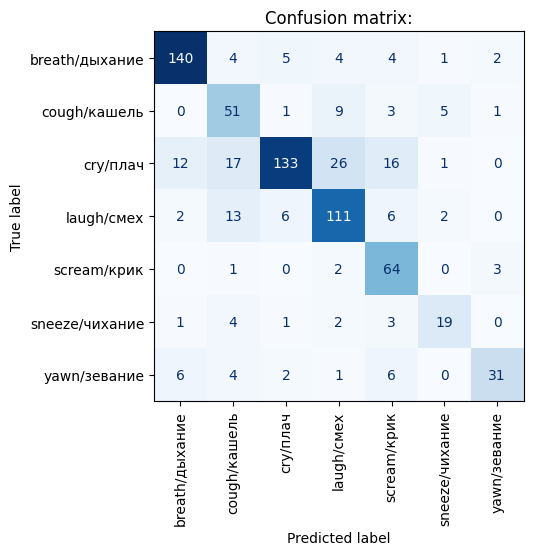

SVM_Sigmoid:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.87     |0.86      |0.88      |
|cough/кашель  |0.44     |0.60      |0.34      |
|crying/плач   |0.57     |0.56      |0.59      |
|laugh/смех    |0.67     |0.61      |0.75      |
|screaming/крик|0.62     |0.63      |0.62      |
|sneeze/чихание|0.41     |0.50      |0.35      |
|yawn/зевание  |0.55     |0.42      |0.81      |
------------------------------------------------
Weighted average Precision : 0.67              |
------------------------------------------------
Weighted average Recall : 0.63                 |
------------------------------------------------
Weighted average F1 : 0.64                     |
------------------------------------------------
Accuracy : 0.63                                |
------------------------------------------------

Confusion matrix:
[[137  11   4   1   4   2   1]
 [  2 

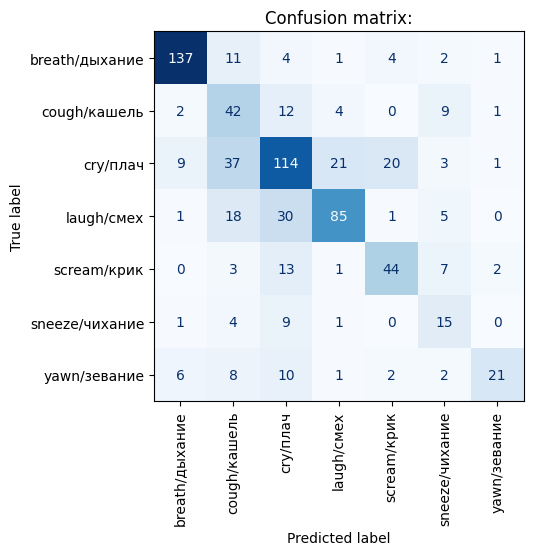

LDA:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.84     |0.82      |0.86      |
|cough/кашель  |0.58     |0.73      |0.48      |
|crying/плач   |0.67     |0.53      |0.92      |
|laugh/смех    |0.74     |0.84      |0.66      |
|screaming/крик|0.69     |0.74      |0.64      |
|sneeze/чихание|0.58     |0.70      |0.50      |
|yawn/зевание  |0.70     |0.68      |0.72      |
------------------------------------------------
Weighted average Precision : 0.76              |
------------------------------------------------
Weighted average Recall : 0.71                 |
------------------------------------------------
Weighted average F1 : 0.71                     |
------------------------------------------------
Accuracy : 0.71                                |
------------------------------------------------

Confusion matrix:
[[132   9   2   4  10   0   3]
 [  1  51   1 

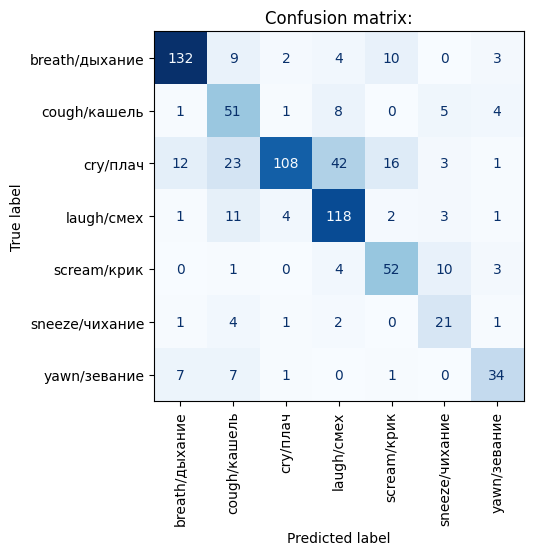

KNN:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.84     |0.91      |0.78      |
|cough/кашель  |0.48     |0.66      |0.38      |
|crying/плач   |0.57     |0.45      |0.76      |
|laugh/смех    |0.60     |0.71      |0.52      |
|screaming/крик|0.50     |0.50      |0.50      |
|sneeze/чихание|0.43     |0.33      |0.62      |
|yawn/зевание  |0.36     |0.24      |0.71      |
------------------------------------------------
Weighted average Precision : 0.65              |
------------------------------------------------
Weighted average Recall : 0.61                 |
------------------------------------------------
Weighted average F1 : 0.60                     |
------------------------------------------------
Accuracy : 0.61                                |
------------------------------------------------

Confusion matrix:
[[146   1   2   2   7   1   1]
 [  3  46   4 

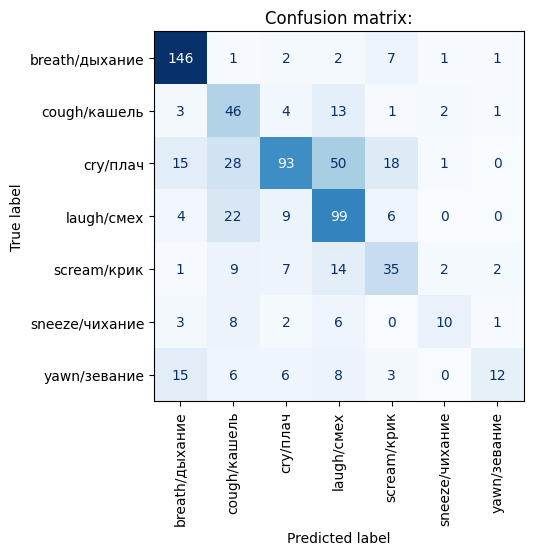

Logistic Regression:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.81     |0.75      |0.88      |
|cough/кашель  |0.63     |0.77      |0.53      |
|crying/плач   |0.69     |0.59      |0.83      |
|laugh/смех    |0.76     |0.82      |0.70      |
|screaming/крик|0.75     |0.83      |0.69      |
|sneeze/чихание|0.65     |0.73      |0.58      |
|yawn/зевание  |0.66     |0.70      |0.62      |
------------------------------------------------
Weighted average Precision : 0.75              |
------------------------------------------------
Weighted average Recall : 0.72                 |
------------------------------------------------
Weighted average F1 : 0.72                     |
------------------------------------------------
Accuracy : 0.72                                |
------------------------------------------------

Confusion matrix:
[[120   9   8   3   6   0  14

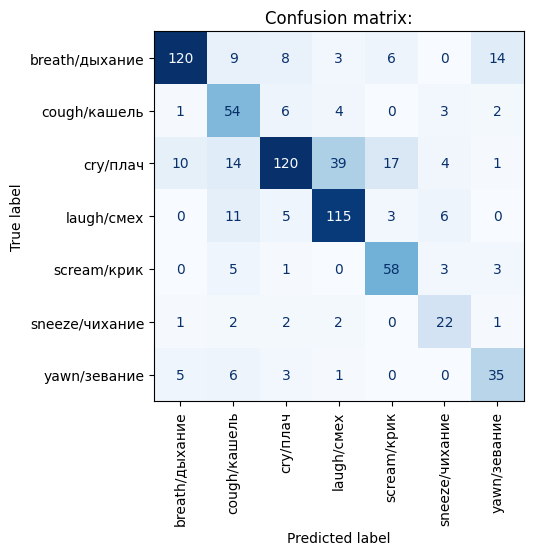

Decision Tree:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.72     |0.66      |0.80      |
|cough/кашель  |0.34     |0.39      |0.30      |
|crying/плач   |0.57     |0.47      |0.72      |
|laugh/смех    |0.47     |0.49      |0.44      |
|screaming/крик|0.49     |0.53      |0.46      |
|sneeze/чихание|0.20     |0.33      |0.14      |
|yawn/зевание  |0.40     |0.46      |0.36      |
------------------------------------------------
Weighted average Precision : 0.57              |
------------------------------------------------
Weighted average Recall : 0.51                 |
------------------------------------------------
Weighted average F1 : 0.53                     |
------------------------------------------------
Accuracy : 0.51                                |
------------------------------------------------

Confusion matrix:
[[105   6   5  11   7   7  19]
 [  

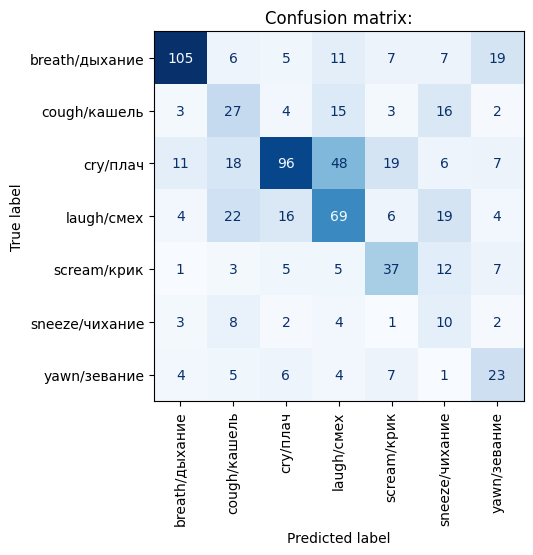

Neural Network:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.84     |0.81      |0.88      |
|cough/кашель  |0.67     |0.79      |0.59      |
|crying/плач   |0.69     |0.58      |0.87      |
|laugh/смех    |0.75     |0.84      |0.68      |
|screaming/крик|0.79     |0.90      |0.70      |
|sneeze/чихание|0.75     |0.83      |0.68      |
|yawn/зевание  |0.78     |0.76      |0.79      |
------------------------------------------------
Weighted average Precision : 0.78              |
------------------------------------------------
Weighted average Recall : 0.75                 |
------------------------------------------------
Weighted average F1 : 0.75                     |
------------------------------------------------
Accuracy : 0.75                                |
------------------------------------------------

Confusion matrix:
[[130   8   3   6   7   0   6]
 [ 

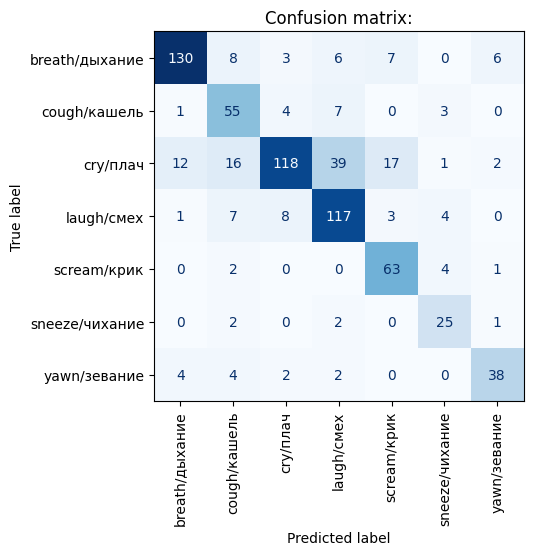

In [30]:
comparing_with_sota_NS(models, names, nonspeech_IS09_train_pca, nonspeech_targets_train_is09, nonspeech_IS09_test_pca, nonspeech_targets_test_is09)

## INTERSPEECH2010 FEATURES TEST

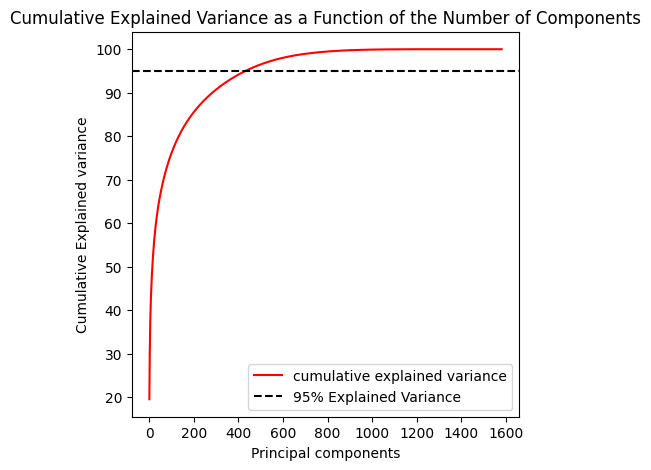

In [31]:
scaler.fit(nonspeech_is10_train)
nonspeech_IS10_train_scaler = scaler.transform(nonspeech_is10_train)
nonspeech_IS10_test_scaler = scaler.transform(nonspeech_is10_test)

plot_relation_between_VAR_and_DIM(nonspeech_IS10_train_scaler)

In [32]:
pca = PCA(.95) 
pca.fit(nonspeech_IS10_train_scaler)

nonspeech_IS10_train_pca = pca.transform(nonspeech_IS10_train_scaler)
nonspeech_IS10_test_pca = pca.transform(nonspeech_IS10_test_scaler)

SVM_Poly:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.84     |0.79      |0.90      |
|cough/кашель  |0.67     |0.70      |0.64      |
|crying/плач   |0.71     |0.64      |0.79      |
|laugh/смех    |0.72     |0.96      |0.58      |
|screaming/крик|0.83     |0.80      |0.86      |
|sneeze/чихание|0.51     |0.43      |0.62      |
|yawn/зевание  |0.64     |0.48      |0.96      |
------------------------------------------------
Weighted average Precision : 0.77              |
------------------------------------------------
Weighted average Recall : 0.74                 |
------------------------------------------------
Weighted average F1 : 0.73                     |
------------------------------------------------
Accuracy : 0.74                                |
------------------------------------------------

Confusion matrix:
[[126   0  15  16   3   0   0]
 [  0  49

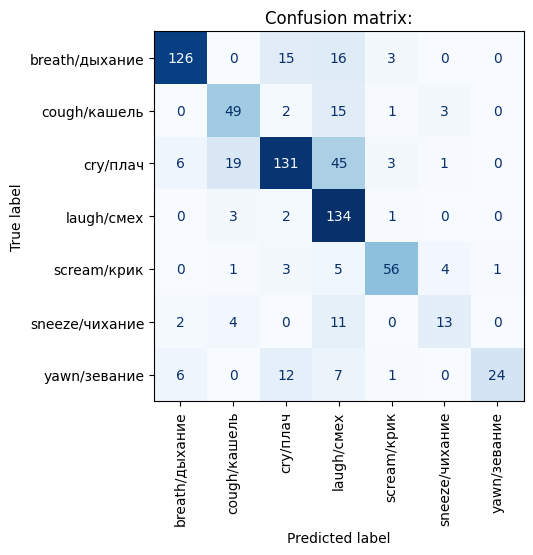

SVM_RBF:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.89     |0.88      |0.90      |
|cough/кашель  |0.72     |0.90      |0.60      |
|crying/плач   |0.76     |0.65      |0.92      |
|laugh/смех    |0.83     |0.86      |0.79      |
|screaming/крик|0.77     |0.91      |0.67      |
|sneeze/чихание|0.65     |0.60      |0.72      |
|yawn/зевание  |0.78     |0.74      |0.82      |
------------------------------------------------
Weighted average Precision : 0.82              |
------------------------------------------------
Weighted average Recall : 0.80                 |
------------------------------------------------
Weighted average F1 : 0.80                     |
------------------------------------------------
Accuracy : 0.80                                |
------------------------------------------------

Confusion matrix:
[[140   5   2   2   5   1   5]
 [  0  63 

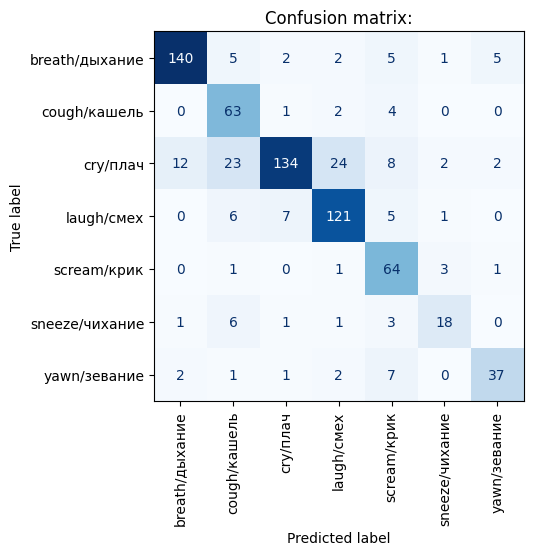

SVM_Sigmoid:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.86     |0.84      |0.87      |
|cough/кашель  |0.56     |0.74      |0.44      |
|crying/плач   |0.60     |0.55      |0.66      |
|laugh/смех    |0.62     |0.61      |0.63      |
|screaming/крик|0.65     |0.67      |0.64      |
|sneeze/чихание|0.39     |0.43      |0.36      |
|yawn/зевание  |0.64     |0.58      |0.72      |
------------------------------------------------
Weighted average Precision : 0.67              |
------------------------------------------------
Weighted average Recall : 0.65                 |
------------------------------------------------
Weighted average F1 : 0.66                     |
------------------------------------------------
Accuracy : 0.65                                |
------------------------------------------------

Confusion matrix:
[[135   7   2   4   3   3   6]
 [  3 

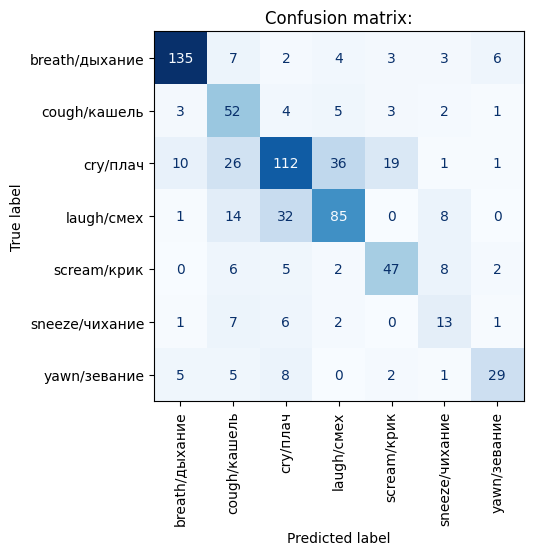

LDA:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.84     |0.79      |0.90      |
|cough/кашель  |0.71     |0.83      |0.62      |
|crying/плач   |0.69     |0.59      |0.85      |
|laugh/смех    |0.77     |0.85      |0.70      |
|screaming/крик|0.74     |0.81      |0.67      |
|sneeze/чихание|0.61     |0.67      |0.56      |
|yawn/зевание  |0.76     |0.82      |0.71      |
------------------------------------------------
Weighted average Precision : 0.77              |
------------------------------------------------
Weighted average Recall : 0.75                 |
------------------------------------------------
Weighted average F1 : 0.75                     |
------------------------------------------------
Accuracy : 0.75                                |
------------------------------------------------

Confusion matrix:
[[127   4   6   2  10   4   7]
 [  1  58   1 

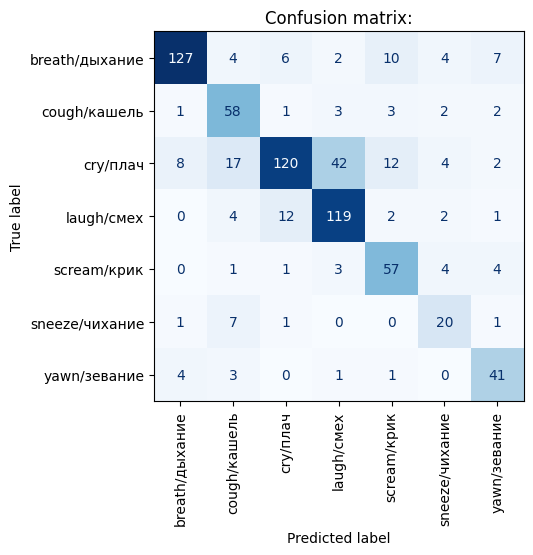

KNN:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.86     |0.87      |0.84      |
|cough/кашель  |0.58     |0.81      |0.45      |
|crying/плач   |0.61     |0.48      |0.84      |
|laugh/смех    |0.66     |0.81      |0.56      |
|screaming/крик|0.60     |0.64      |0.56      |
|sneeze/чихание|0.38     |0.27      |0.67      |
|yawn/зевание  |0.53     |0.38      |0.86      |
------------------------------------------------
Weighted average Precision : 0.72              |
------------------------------------------------
Weighted average Recall : 0.66                 |
------------------------------------------------
Weighted average F1 : 0.65                     |
------------------------------------------------
Accuracy : 0.66                                |
------------------------------------------------

Confusion matrix:
[[139   1   1   6  11   1   1]
 [  1  57   2 

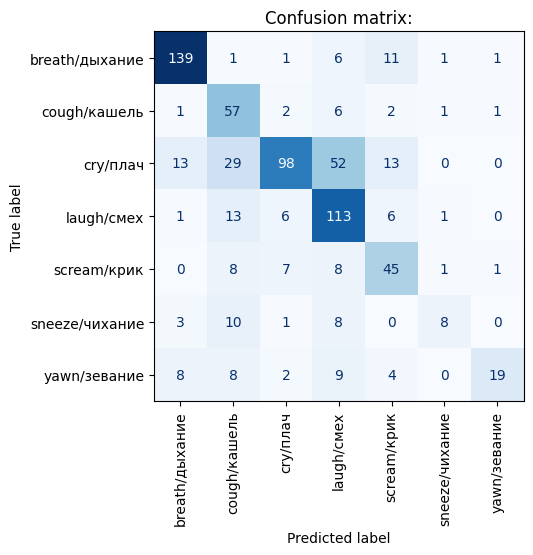

Logistic Regression:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.88     |0.84      |0.92      |
|cough/кашель  |0.64     |0.77      |0.54      |
|crying/плач   |0.68     |0.57      |0.85      |
|laugh/смех    |0.73     |0.73      |0.73      |
|screaming/крик|0.74     |0.84      |0.66      |
|sneeze/чихание|0.50     |0.70      |0.39      |
|yawn/зевание  |0.79     |0.88      |0.72      |
------------------------------------------------
Weighted average Precision : 0.77              |
------------------------------------------------
Weighted average Recall : 0.73                 |
------------------------------------------------
Weighted average F1 : 0.74                     |
------------------------------------------------
Accuracy : 0.73                                |
------------------------------------------------

Confusion matrix:
[[134   5   6   2   3   6   4

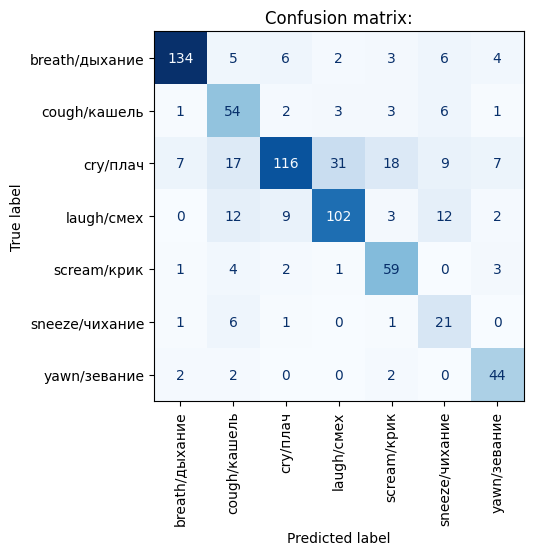

Decision Tree:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.79     |0.76      |0.82      |
|cough/кашель  |0.38     |0.47      |0.32      |
|crying/плач   |0.57     |0.51      |0.63      |
|laugh/смех    |0.48     |0.50      |0.45      |
|screaming/крик|0.39     |0.37      |0.40      |
|sneeze/чихание|0.18     |0.23      |0.15      |
|yawn/зевание  |0.28     |0.26      |0.31      |
------------------------------------------------
Weighted average Precision : 0.54              |
------------------------------------------------
Weighted average Recall : 0.52                 |
------------------------------------------------
Weighted average F1 : 0.53                     |
------------------------------------------------
Accuracy : 0.52                                |
------------------------------------------------

Confusion matrix:
[[121  10   4   7   8   2   8]
 [  

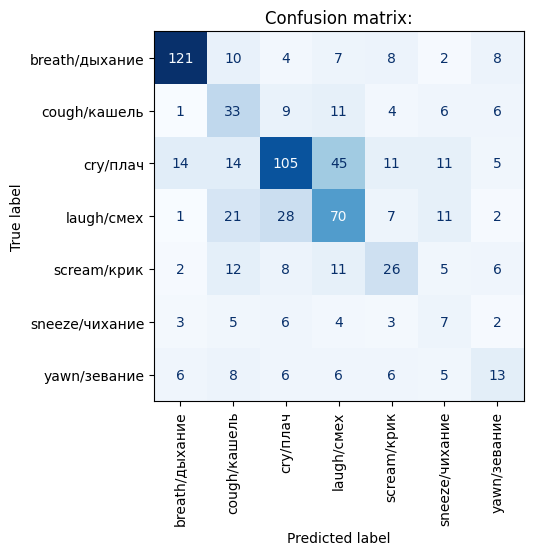

Neural Network:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.90     |0.87      |0.93      |
|cough/кашель  |0.68     |0.83      |0.57      |
|crying/плач   |0.74     |0.64      |0.86      |
|laugh/смех    |0.82     |0.85      |0.78      |
|screaming/крик|0.80     |0.84      |0.76      |
|sneeze/чихание|0.62     |0.67      |0.57      |
|yawn/зевание  |0.81     |0.86      |0.77      |
------------------------------------------------
Weighted average Precision : 0.80              |
------------------------------------------------
Weighted average Recall : 0.79                 |
------------------------------------------------
Weighted average F1 : 0.79                     |
------------------------------------------------
Accuracy : 0.79                                |
------------------------------------------------

Confusion matrix:
[[139   2   4   2   5   2   6]
 [ 

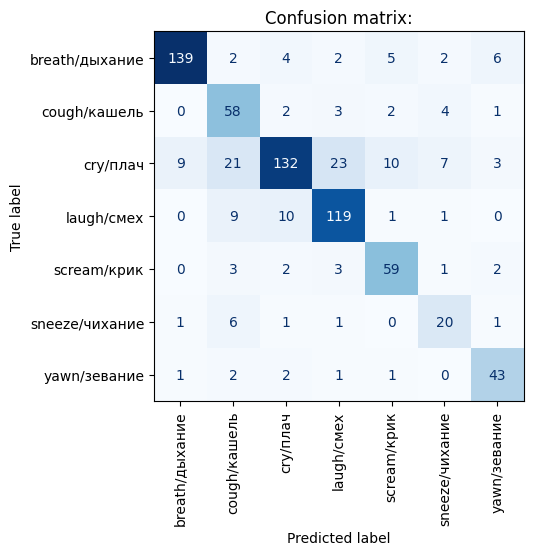

In [33]:
comparing_with_sota_NS(models, names, nonspeech_IS10_train_pca, nonspeech_targets_train_is10, nonspeech_IS10_test_pca, nonspeech_targets_test_is10)

## INTERSPEECH2013 FEATURES TEST

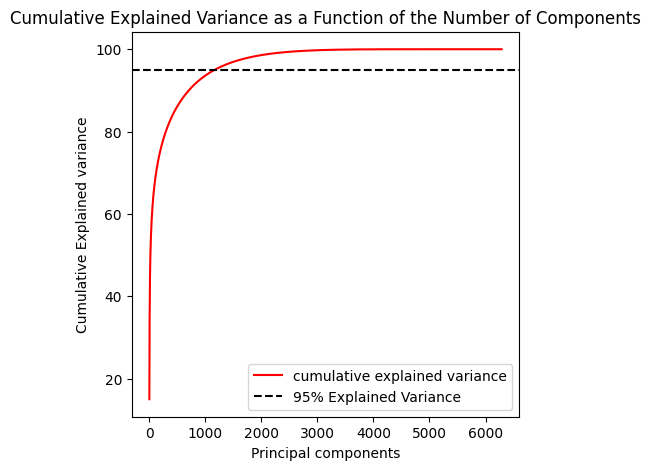

In [34]:
# Nonspeech7k egemaps
scaler.fit(nonspeech_is13_train)
nonspeech_IS13_train_scaler = scaler.transform(nonspeech_is13_train)
nonspeech_IS13_test_scaler = scaler.transform(nonspeech_is13_test)

plot_relation_between_VAR_and_DIM(nonspeech_IS13_train_scaler)

In [35]:
pca = PCA(.95) 
pca.fit(nonspeech_IS13_train_scaler)

nonspeech_IS13_train_pca = pca.transform(nonspeech_IS13_train_scaler)
nonspeech_IS13_test_pca = pca.transform(nonspeech_IS13_test_scaler)

SVM_Poly:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.83     |0.79      |0.88      |
|cough/кашель  |0.66     |0.63      |0.69      |
|crying/плач   |0.68     |0.87      |0.57      |
|laugh/смех    |0.80     |0.71      |0.91      |
|screaming/крик|0.72     |0.60      |0.91      |
|sneeze/чихание|0.39     |0.37      |0.42      |
|yawn/зевание  |0.54     |0.38      |0.90      |
------------------------------------------------
Weighted average Precision : 0.76              |
------------------------------------------------
Weighted average Recall : 0.72                 |
------------------------------------------------
Weighted average F1 : 0.72                     |
------------------------------------------------
Accuracy : 0.72                                |
------------------------------------------------

Confusion matrix:
[[126   2  28   0   2   0   2]
 [  1  44

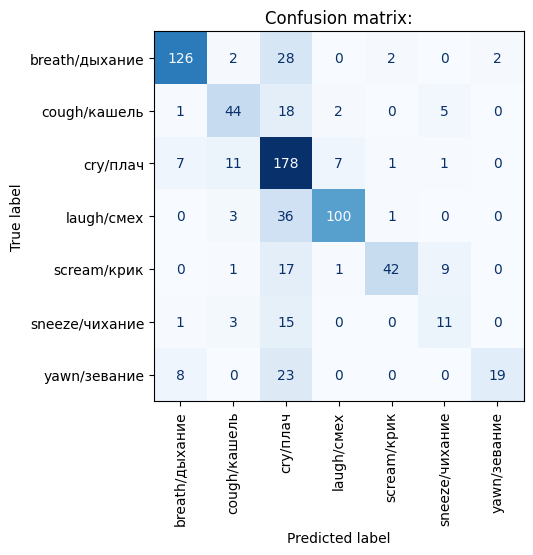

SVM_RBF:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.89     |0.90      |0.89      |
|cough/кашель  |0.72     |0.84      |0.62      |
|crying/плач   |0.83     |0.75      |0.92      |
|laugh/смех    |0.83     |0.89      |0.78      |
|screaming/крик|0.85     |0.84      |0.86      |
|sneeze/чихание|0.68     |0.60      |0.78      |
|yawn/зевание  |0.79     |0.80      |0.78      |
------------------------------------------------
Weighted average Precision : 0.84              |
------------------------------------------------
Weighted average Recall : 0.82                 |
------------------------------------------------
Weighted average F1 : 0.83                     |
------------------------------------------------
Accuracy : 0.82                                |
------------------------------------------------

Confusion matrix:
[[144   5   0   2   2   0   7]
 [  0  59 

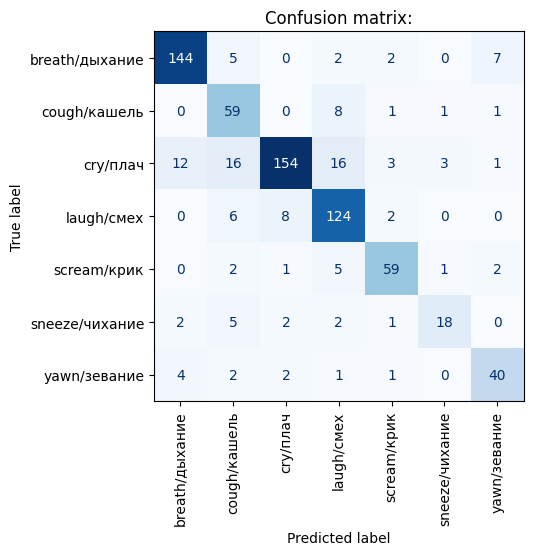

SVM_Sigmoid:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.90     |0.94      |0.87      |
|cough/кашель  |0.61     |0.67      |0.57      |
|crying/плач   |0.73     |0.68      |0.79      |
|laugh/смех    |0.71     |0.74      |0.68      |
|screaming/крик|0.84     |0.86      |0.82      |
|sneeze/чихание|0.42     |0.43      |0.41      |
|yawn/зевание  |0.79     |0.68      |0.94      |
------------------------------------------------
Weighted average Precision : 0.76              |
------------------------------------------------
Weighted average Recall : 0.75                 |
------------------------------------------------
Weighted average F1 : 0.76                     |
------------------------------------------------
Accuracy : 0.75                                |
------------------------------------------------

Confusion matrix:
[[150   3   1   1   3   2   0]
 [  0 

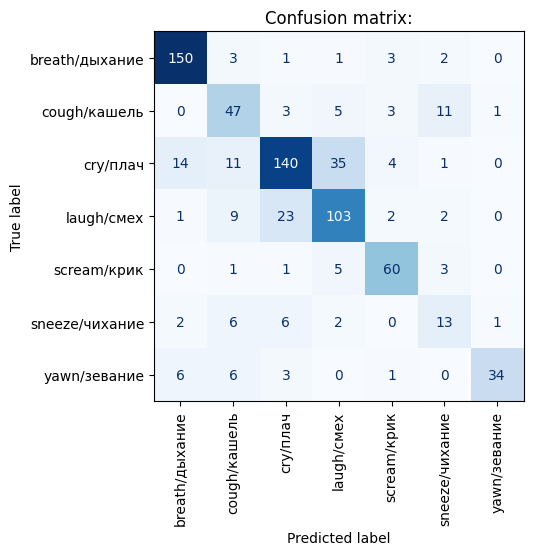

LDA:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.91     |0.93      |0.90      |
|cough/кашель  |0.68     |0.80      |0.59      |
|crying/плач   |0.77     |0.68      |0.88      |
|laugh/смех    |0.83     |0.88      |0.79      |
|screaming/крик|0.84     |0.80      |0.88      |
|sneeze/чихание|0.67     |0.73      |0.61      |
|yawn/зевание  |0.86     |0.88      |0.85      |
------------------------------------------------
Weighted average Precision : 0.83              |
------------------------------------------------
Weighted average Recall : 0.81                 |
------------------------------------------------
Weighted average F1 : 0.81                     |
------------------------------------------------
Accuracy : 0.81                                |
------------------------------------------------

Confusion matrix:
[[148   5   2   2   1   0   2]
 [  0  56   2 

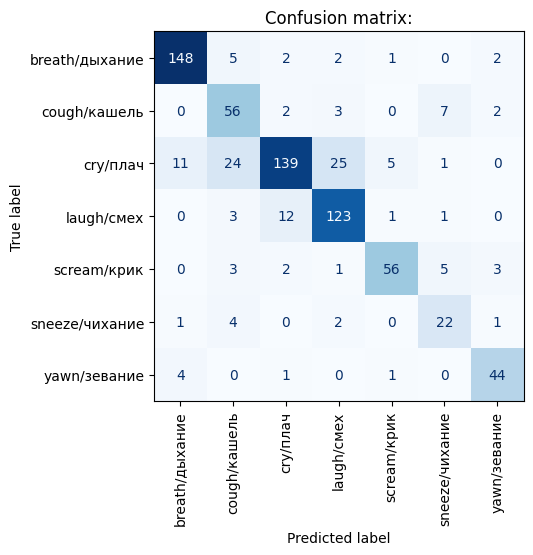

KNN:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.82     |0.91      |0.74      |
|cough/кашель  |0.63     |0.73      |0.56      |
|crying/плач   |0.68     |0.58      |0.82      |
|laugh/смех    |0.73     |0.84      |0.64      |
|screaming/крик|0.56     |0.61      |0.52      |
|sneeze/чихание|0.38     |0.27      |0.67      |
|yawn/зевание  |0.51     |0.34      |1.00      |
------------------------------------------------
Weighted average Precision : 0.72              |
------------------------------------------------
Weighted average Recall : 0.69                 |
------------------------------------------------
Weighted average F1 : 0.68                     |
------------------------------------------------
Accuracy : 0.69                                |
------------------------------------------------

Confusion matrix:
[[146   2   1   1  10   0   0]
 [  8  51   4 

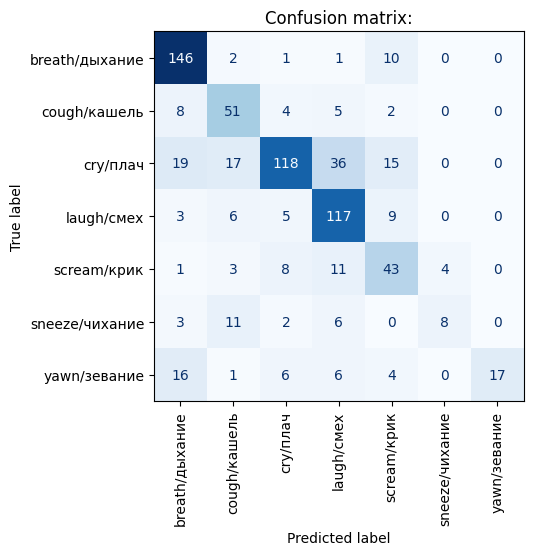

Logistic Regression:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.88     |0.86      |0.90      |
|cough/кашель  |0.67     |0.79      |0.59      |
|crying/плач   |0.79     |0.71      |0.89      |
|laugh/смех    |0.84     |0.86      |0.82      |
|screaming/крик|0.85     |0.86      |0.85      |
|sneeze/чихание|0.60     |0.67      |0.54      |
|yawn/зевание  |0.76     |0.84      |0.70      |
------------------------------------------------
Weighted average Precision : 0.82              |
------------------------------------------------
Weighted average Recall : 0.80                 |
------------------------------------------------
Weighted average F1 : 0.80                     |
------------------------------------------------
Accuracy : 0.80                                |
------------------------------------------------

Confusion matrix:
[[138   5   2   4   3   2   6

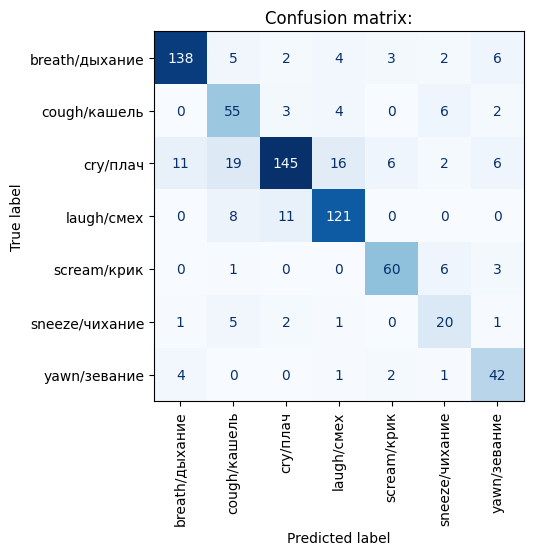

Decision Tree:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.77     |0.74      |0.81      |
|cough/кашель  |0.44     |0.57      |0.36      |
|crying/плач   |0.55     |0.51      |0.60      |
|laugh/смех    |0.45     |0.46      |0.45      |
|screaming/крик|0.51     |0.44      |0.60      |
|sneeze/чихание|0.39     |0.43      |0.35      |
|yawn/зевание  |0.37     |0.42      |0.33      |
------------------------------------------------
Weighted average Precision : 0.57              |
------------------------------------------------
Weighted average Recall : 0.54                 |
------------------------------------------------
Weighted average F1 : 0.55                     |
------------------------------------------------
Accuracy : 0.54                                |
------------------------------------------------

Confusion matrix:
[[118   6  10   7   2   5  12]
 [  

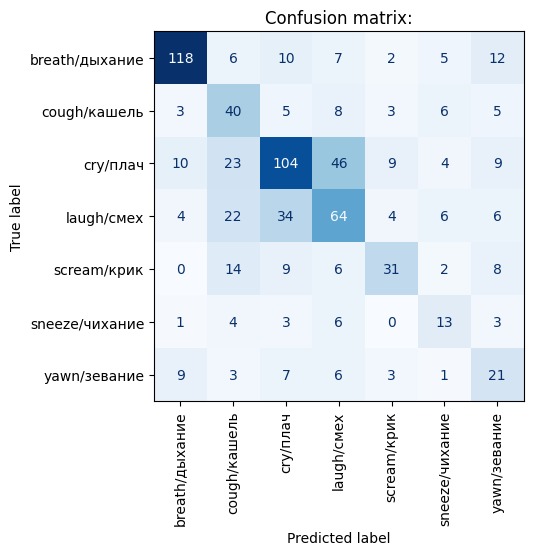

Neural Network:
------------------------------------------------
|  Class       |F1-score |Recall    |Precision |
------------------------------------------------
|breath/дыхание|0.91     |0.91      |0.90      |
|cough/кашель  |0.72     |0.84      |0.63      |
|crying/плач   |0.78     |0.70      |0.88      |
|laugh/смех    |0.87     |0.89      |0.85      |
|screaming/крик|0.82     |0.79      |0.86      |
|sneeze/чихание|0.61     |0.73      |0.52      |
|yawn/зевание  |0.82     |0.86      |0.78      |
------------------------------------------------
Weighted average Precision : 0.83              |
------------------------------------------------
Weighted average Recall : 0.82                 |
------------------------------------------------
Weighted average F1 : 0.82                     |
------------------------------------------------
Accuracy : 0.82                                |
------------------------------------------------

Confusion matrix:
[[146   3   3   2   1   0   5]
 [ 

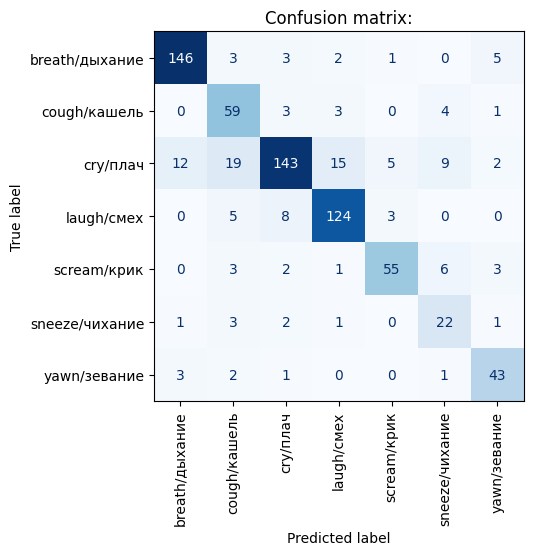

In [36]:
comparing_with_sota_NS(models, names, nonspeech_IS13_train_pca, nonspeech_targets_train_is13, nonspeech_IS13_test_pca, nonspeech_targets_test_is13)